<a href="http://cocl.us/pytorch_link_top">
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/Pytochtop.png" width="750" alt="IBM Product " />
</a> 

<img src="https://ibm.box.com/shared/static/ugcqz6ohbvff804xp84y4kqnvvk3bq1g.png" width="200" alt="cognitiveclass.ai logo" />

<h1>Hidden Layer Deep Network: Sigmoid, Tanh and Relu Activations Functions MNIST Dataset</h1>

<h2>Table of Contents</h2>
<p>In this lab, you will test Sigmoid, Tanh and Relu activation functions on the MNIST dataset with two hidden Layers.</p>

<ul>
    <li><a href="#Model">Neural Network Module and Training Function</a></li>
    <li><a href="#Makeup_Data">Make Some Data</a></li>
    <li><a href="#Train">Define Several Neural Network, Criterion function, Optimizer</a></li>
    <li><a href="#Test">Test Sigmoid ,Tanh and Relu </a></li>
    <li><a href="#Result">Analyse Results</a></li>
</ul>
<p>Estimated Time Needed: <strong>25 min</strong></p>

<hr>

We'll need the following libraries

In [1]:
# Import the libraries we need for this lab

# Using the following line code to install the torchvision library
# !conda install -y torchvision

import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import torch.nn.functional as F
import matplotlib.pylab as plt
import numpy as np
torch.manual_seed(2)

<!--Empty Space for separating topics-->

<h2 id="Model">Neural Network Module and Training Function</h2> 

Define the neural network module or class, with two hidden Layers 

<img src="https://ibm.box.com/shared/static/5wtclahun0f70qlwkn2kxzh3amnbq4zg.png" width="200" alt="Neural Network Model" />

In [2]:
# Create the model class using sigmoid as the activation function

class Net(nn.Module):
    
    # Constructor
#     D_in is the size of the number of input features, 
#     it is also the size of the input dimensions for 
#     each neuron in the hidden layer. 
    def __init__(self, D_in, H1, H2, D_out):
        super(Net, self).__init__()
        #     This is the constructor for the first hidden layer. 
        #     The parameter H1, is the number of neurons in the hidden layer. 
        self.linear1 = nn.Linear(D_in, H1)
        #     This is the constructor for the second hidden layer. 
        #     The size of the input dimension for each number is H1. 
        #     This is the number of neurons in the previous hidden layer. 
        #     The number of neurons in the second hidden layer, is given by H2.
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, D_out)
    
    # Prediction
    # two hidden layers and one output layer
    def forward(self,x):
        x = torch.sigmoid(self.linear1(x)) 
        x = torch.sigmoid(self.linear2(x))
        x = self.linear3(x)
        return x

Define the class with the Tanh activation function 

In [16]:
# Create the model class using Tanh as a activation function

class NetTanh(nn.Module):
    
    # Constructor
    def __init__(self, D_in, H1, H2, D_out):
        super(NetTanh, self).__init__()
        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, D_out)
    
    # Prediction
#     We can construct a deep neural network model with a tanh activation function. 
    def forward(self, x):
        x = torch.tanh(self.linear1(x))
        x = torch.tanh(self.linear2(x))
        x = self.linear3(x)
        return x

Define the class for the Relu activation function 

In [3]:
# Create the model class using Relu as a activation function

class NetRelu(nn.Module):
    
    # Constructor
    def __init__(self, D_in, H1, H2, D_out):
        super(NetRelu, self).__init__()
        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, D_out)
    
    # Prediction
#     Again, we can also construct a deep neural network model with the 
# relu activation function. We only need to replace the sigmoid function with the relu activation function in forward
    def forward(self, x):
        x = torch.relu(self.linear1(x))  
        x = torch.relu(self.linear2(x))
        x = self.linear3(x)
        return x

Consider the following network. 
The first hidden layer has 3 neurons. 
As the input has 3 dimensions, each neuron will have 3 input dimensions. 
The second layer has 4 neurons. As the input has 3 dimensional, 
each neuron will have 3 inputs. The output layer has 3 neurons for each class. 
As a result, the input size is 4. Each neuron will have 4 input dimensions. 
The attribute parameters is a useful parameter to check the shape of the network.

In [4]:
model = Net(D_in=3,H1=3,H2=4,D_out=3)
model.parameters

<bound method Module.parameters of Net(
  (linear1): Linear(in_features=3, out_features=3, bias=True)
  (linear2): Linear(in_features=3, out_features=4, bias=True)
  (linear3): Linear(in_features=4, out_features=3, bias=True)
)>

In [5]:
model1=torch.nn.Sequential(
torch.nn.Linear(in_features=3,out_features=3), torch.nn.Sigmoid(),
torch.nn.Linear(in_features=3,out_features=4), torch.nn.Sigmoid(),   
torch.nn.Linear(in_features=4,out_features=3)
)
model1.parameters

<bound method Module.parameters of Sequential(
  (0): Linear(in_features=3, out_features=3, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=3, out_features=4, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=4, out_features=3, bias=True)
)>

Define a function to  train the model, in this case the function returns a Python dictionary to store the training loss and accuracy on the validation data 

In [19]:
# Train the model

def train(model, criterion, train_loader, validation_loader, optimizer, epochs=100):
    i = 0
    useful_stuff = {'training_loss': [], 'validation_accuracy': []}  
    
    for epoch in range(epochs):
        for i, (x, y) in enumerate(train_loader):
            optimizer.zero_grad()
            z = model(x.view(-1, 28 * 28))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            useful_stuff['training_loss'].append(loss.data.item())
        
        correct = 0
        for x, y in validation_loader:
            z = model(x.view(-1, 28 * 28))
            _, label = torch.max(z, 1)
            correct += (label == y).sum().item()
    
        accuracy = 100 * (correct / len(validation_dataset))
        useful_stuff['validation_accuracy'].append(accuracy)
        print('epoch: '+str(epoch) + "/"+str(epochs)+"  training_loss: " + str(loss.data.item()) + '  validation_accuracy: ' + str(accuracy))
    
    return useful_stuff

<!--Empty Space for separating topics-->

<h2 id="Makeup_Data">Make Some Data</h2> 

Load the training dataset by setting the parameters <code>train</code> to <code>True</code> and convert it to a tensor  by placing a transform object int the argument <code>transform</code>

In [ ]:
# Create the training dataset

train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())

Load the testing dataset by setting the parameters <code>train</code> to <code>False</code> and convert it to a tensor  by placing a transform object int the argument <code>transform</code>

In [8]:
# Create the validating dataset

validation_dataset = dsets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

Create the criterion function  

In [9]:
# Create the criterion function

criterion = nn.CrossEntropyLoss()

Create the training-data loader and the validation-data loader object 

In [10]:
# Create the training data loader and validation data loader object

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=2000, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000, shuffle=False)

<!--Empty Space for separating topics-->

<h2 id="Train">Define Neural Network, Criterion function, Optimizer and Train the Model</h2> 

Create  the model with 100 hidden layers  

In [11]:
# Set the parameters for create the model

input_dim = 28 * 28
hidden_dim1 = 50
hidden_dim2 = 50
output_dim = 10

The epoch number in the video is 35. You can try 10 for now. If you try 35, it may take a long time.

In [12]:
# Set the number of iterations

cust_epochs = 10

<!--Empty Space for separating topics-->

<h2 id="Test">Test Sigmoid ,Tanh and Relu</h2> 

Train the network using the Sigmoid activation function

In [13]:
# Train the model with sigmoid function

learning_rate = 0.01
model = Net(input_dim, hidden_dim1, hidden_dim2, output_dim)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
training_results = train(model, criterion, train_loader, validation_loader, optimizer, epochs=cust_epochs)

Train the network using the Tanh activation function

In [17]:
# Train the model with tanh function

learning_rate = 0.01
model_Tanh = NetTanh(input_dim, hidden_dim1, hidden_dim2, output_dim)
optimizer = torch.optim.SGD(model_Tanh.parameters(), lr=learning_rate)
training_results_tanch = train(model_Tanh, criterion, train_loader, validation_loader, optimizer, epochs=cust_epochs)

epoch:   0    training_loss:2.2845025062561035validation_accuracy16.869999999999997
epoch:   1    training_loss:2.2416555881500244validation_accuracy27.24
epoch:   2    training_loss:2.2105181217193604validation_accuracy32.67
epoch:   3    training_loss:2.162243366241455validation_accuracy37.95
epoch:   4    training_loss:2.118891954421997validation_accuracy46.21
epoch:   5    training_loss:2.0667619705200195validation_accuracy52.470000000000006
epoch:   6    training_loss:2.0103211402893066validation_accuracy55.400000000000006
epoch:   7    training_loss:1.9462333917617798validation_accuracy56.68
epoch:   8    training_loss:1.8802711963653564validation_accuracy57.56
epoch:   9    training_loss:1.7940692901611328validation_accuracy58.709999999999994


Train the network using the Relu activation function

In [20]:
# Train the model with relu function

learning_rate = 0.01
modelRelu = NetRelu(input_dim, hidden_dim1, hidden_dim2, output_dim)
optimizer = torch.optim.SGD(modelRelu.parameters(), lr=learning_rate)
training_results_relu = train(modelRelu, criterion, train_loader, validation_loader, optimizer, epochs=cust_epochs)

epoch: 0/10  training_loss: 2.30363130569458  validation_accuracy: 6.660000000000001
epoch: 1/10  training_loss: 2.293074369430542  validation_accuracy: 7.86
epoch: 2/10  training_loss: 2.284592628479004  validation_accuracy: 9.74
epoch: 3/10  training_loss: 2.278877019882202  validation_accuracy: 15.0
epoch: 4/10  training_loss: 2.2690014839172363  validation_accuracy: 22.49
epoch: 5/10  training_loss: 2.2547712326049805  validation_accuracy: 28.89
epoch: 6/10  training_loss: 2.2452869415283203  validation_accuracy: 36.27
epoch: 7/10  training_loss: 2.2319884300231934  validation_accuracy: 40.02
epoch: 8/10  training_loss: 2.2127633094787598  validation_accuracy: 42.230000000000004
epoch: 9/10  training_loss: 2.1863045692443848  validation_accuracy: 45.190000000000005


<!--Empty Space for separating topics-->

<h2 id="Result">Analyze Results</h2> 

Compare the training loss for each activation 

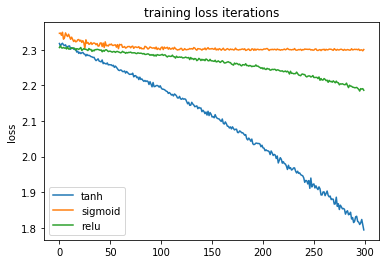

In [21]:
# Compare the training loss

plt.plot(training_results_tanch['training_loss'], label='tanh')
plt.plot(training_results['training_loss'], label='sigmoid')
plt.plot(training_results_relu['training_loss'], label='relu')
plt.ylabel('loss')
plt.title('training loss iterations')
plt.legend()

Compare the validation loss for each model  

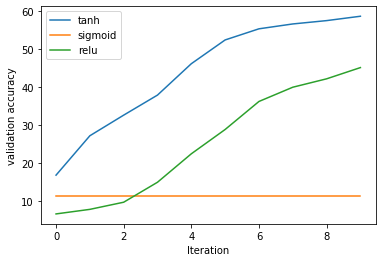

In [22]:
# Compare the validation loss

plt.plot(training_results_tanch['validation_accuracy'], label = 'tanh')
plt.plot(training_results['validation_accuracy'], label = 'sigmoid')
plt.plot(training_results_relu['validation_accuracy'], label = 'relu') 
plt.ylabel('validation accuracy')
plt.xlabel('Iteration')   
plt.legend()

<!--Empty Space for separating topics-->


<a href="http://cocl.us/pytorch_link_bottom">
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/notebook_bottom%20.png" width="750" alt="PyTorch Bottom" />

<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD. 

Other contributors: <a href="https://www.linkedin.com/in/michelleccarey/">Michelle Carey</a>, <a href="www.linkedin.com/in/jiahui-mavis-zhou-a4537814a">Mavis Zhou</a>

<hr>

Copyright &copy; 2018 <a href="cognitiveclass.ai?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu">cognitiveclass.ai</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.